## Assignment 2

## Imports
It is important for all (or most) imports to go on the top of a notebook so that other users know which packages need to be installed. In projects that use Anaconda, it is also common to see a file named requirements.txt listing all the packages that one has to install.

First, let's import all the necessary modules using the import function. For this exercise we will continue to use Pandas, and will gain more experience using Numpy, Matplotlib, and Seaborn.

To learn more about these packages, you can read through the documentation:  
https://pandas.pydata.org/  
https://numpy.org/  
https://seaborn.pydata.org/  
https://matplotlib.org/

In [15]:
# Let's import the relevant Python packages here
# Feel free to import any other packages for this project

#Data Wrangling
import pandas as pd
import numpy as np

#Sci Kit Learn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

#Stats Models
import statsmodels.formula.api as smf
import statsmodels.api as sm

#Metrics
from sklearn.metrics import mean_squared_error

#Plotting
import matplotlib.pyplot as plt

%matplotlib inline

## Data 1
First, we will use the Data1 dataset to generate polynomial regressions using scikitlearn.
This dataset contains 100 observations of points x and their corresponding response, y. The data
is divided into a training set (xtr, ytr) and a test set (xte, yte).

Let's load the Data1 dataset using pandas and check a couple of rows 

In [16]:
Data1 = pd.read_csv("Data1.csv")
Data1.head()

,x_tr,y_tr,x_te,y_te
0,0.249973,-0.225565,0.006047,0.043946
1,0.073364,0.435610,0.483860,-0.066113
2,0.663146,0.507205,0.123247,0.859564
3,0.595366,0.059467,0.307679,-0.305032
4,0.415146,-0.035114,0.926060,-0.472700


Let's create a scatter plot of y_tr against x_tr 

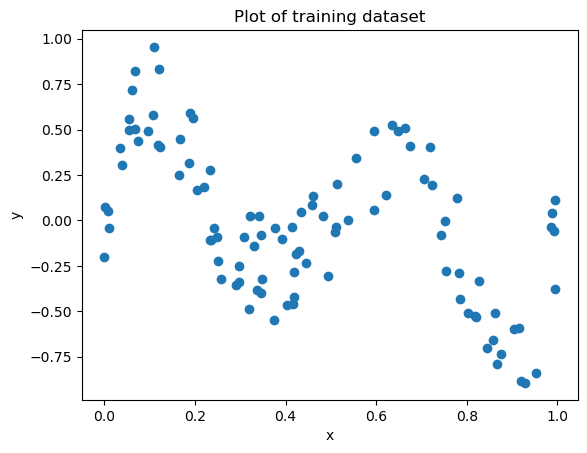

In [17]:
plt.plot(Data1['x_tr'],Data1['y_tr'],'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Plot of training dataset")
plt.show()

In [18]:
# Let's try to find the maximum y value in training data 

print("Max value of y in the training set: %s " % Data1.y_tr.max())

Max value of y in the training set: 0.95500282089616 


1. Now, make a scatter plot of y_te against x_te. Find the maximum value of y in testing data and save this in a variable called `max_y_te`. Notice the similarities and differences between the plots.

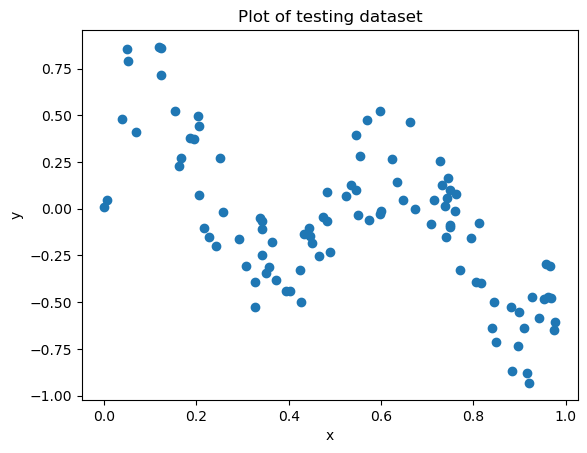

In [19]:
# Write code for scatter plot like above
# your code here
plt.plot(Data1['x_te'],Data1['y_te'],'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Plot of testing dataset")
plt.show()

In [20]:
max_y_te = Data1.y_te.max() # Store the maximum value of y in testing data 
print("Max value of y in the testing set: %s " % max_y_te)

# your code here
#raise NotImplementedError

Max value of y in the testing set: 0.8655959436070828 


In [22]:
##########################
### TEST YOUR SOLUTION ###
##########################

import math
assert math.isclose(max_y_te,0.865, rel_tol=0.001), "Max value of y in the testing set is wrong, please try again.."

### Observation:
Both the training set and test set range from 0 to approximately 1.0 on the x-axis. However, they differ slightly in range on the y-axis, as indicated below. Both sets have a negative polynomial relationship that seems to fit an odd-powered polynomial like $y=x^3$  or  $y=x^5$ . It seems, however, that the training set has a few end points that trend upward, while the test set has end points that shift mostly downward, which is bit concerning because we will only be training our model on the training set.

In [23]:
Data1.describe()

,x_tr,y_tr,x_te,y_te
count,100.000000,100.000000,100.000000,100.000000
mean,0.458643,-0.025843,0.536497,-0.077955
std,0.297692,0.414122,0.281253,0.394800
min,0.000227,-0.894846,0.000943,-0.932274
25%,0.229455,-0.326359,0.327842,-0.355185
50%,0.418045,-0.037512,0.546187,-0.079175
75%,0.728595,0.282205,0.760411,0.127002
max,0.995734,0.955003,0.977284,0.865596


2. Perform the following 
-  Generate the necessary features to fit polynomial regressions up to the 20th degree (up to and including the x^20 term) on the training data. 
    
-  Fit Linear regression model
-  Calculate mean squared error on train and test data

Hint: You will be fitting multi-variate linear regression models with polynomial features of x. Familiarize yourself with sklearn.preprocessing.PolynomialFeatures.

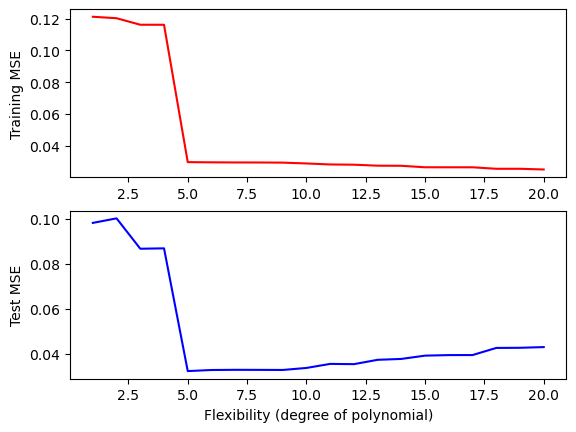

In [26]:
x_tr = Data1[['x_tr']]
y_tr = Data1[['y_tr']]
max_degree = 21
mse_train_list = []
mse_test_list = []

x_te = Data1[['x_te']]
y_te = Data1[['y_te']]

## Fit polynomial regressions from 1 to 20 degrees 
# Reference: https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

for d in range(1,max_degree):
    
    polynomial_features = PolynomialFeatures(degree = d) # Hint: Use PolynomialFeatures() with degree d 
    
    poly = polynomial_features.fit_transform(x_tr) # Hint: Fit transform on polynomialFeatures using 'x' train data
    
    poly_model = LinearRegression() # Hint: Use a model like LinearRegression and fit the model using 'poly' and 'y' train data
    poly_model.fit(poly, y_tr)
    
    # your code here
    #raise NotImplementedError
    
    ## Predict training values using the fitted poly_model
    y_train_pred = poly_model.predict(poly)
    
    mse_train = mean_squared_error(y_tr, y_train_pred) # Hint: Calculate the mean squared error between y_tr and y_train_pred
   
    # your code here
    #raise NotImplementedError

    mse_train_list.append(mse_train) 

    y_test_pred = poly_model.predict(polynomial_features.fit_transform(Data1[['x_te']])) 
    mse_test = mean_squared_error(y_te, y_test_pred) # Hint: Calculate the mean squared error between y_te and y_test_pred
    
    # your code here
    #raise NotImplementedError
    
    mse_test_list.append(mse_test)
    
    
plt.subplot(2,1,1)
plt.plot(range(1,max_degree), mse_train_list, '-r')
plt.ylabel("Training MSE")
plt.subplot(2,1,2)
plt.plot(range(1,max_degree), mse_test_list, '-b')
plt.xlabel("Flexibility (degree of polynomial)")
plt.ylabel("Test MSE")
plt.show()

In [27]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert abs(min(mse_train_list) - 0.024) < 0.001, "Minimum value in mse_train_list is wrong. Please try again.."
assert abs(min(mse_test_list) - 0.032) < 0.001, "Minimum value in mse_test_list is wrong. Please try again.."
assert abs(mse_train_list[4] - 0.029) < 0.001, "One of the values in mse_train_list is wrong. Please try again.."
assert abs(mse_test_list[4] - 0.032) < 0.001, "One of the values in mse_test_list is wrong. Please try again.."

print("test passed!")

test passed!


## Data 2 

Next, we will use the Ch3PartB dataset to observe the effects of collinearity using statsmodels.
This dataset contains 100 observations of points x1, x2, and y, the response variable.

In [28]:
Data2 = pd.read_csv("Data2.csv").copy()
Data2.head()

,Unnamed: 0,x1,x2,y
0,0,0.417022,0.240074,2.949735
1,1,0.720324,0.157942,3.261717
2,2,0.000114,-0.030563,3.322517
3,3,0.302333,0.233964,2.387546
4,4,0.146756,0.096387,3.002498


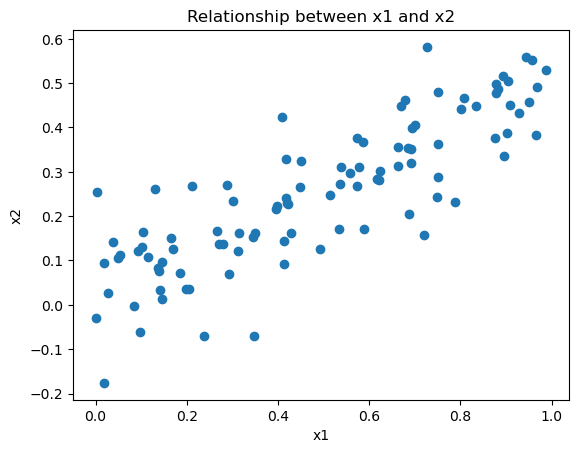

In [29]:
# Let's check the scatter plot for this data

plt.scatter(Data2.x1, Data2.x2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Relationship between x1 and x2')
plt.show()

3. Using the data, fit a least squares regression to predict y using x1 and x2.

In [30]:
# your code here
#raise NotImplementedError

x1 = Data2[['x1']]
x2 = Data2[['x2']]
y  = Data2[['y']]

fit_both = smf.ols(formula = 'y ~ x1+x2', data = Data2).fit() # Hint: Use smf ols to fit regression to predict y using x1 and x2
fit_both.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     17.09
Date:                Mon, 11 Nov 2024   Prob (F-statistic):           4.40e-07
Time:                        04:39:43   Log-Likelihood:                -142.34
No. Observations:                 100   AIC:                             290.7
Df Residuals:                      97   BIC:                             298.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1893      0.199     11.021      0.000       1.795       2.584
x1             0.7046      0.637      1.107      0.271      -0.559       1.968
x2             2.5024      1.140      2.194      0.031       0.239       4.766
==============================================================================
Omnibus:                        0.607   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.738   Jarque-Bera (JB):                0.577
Skew:                          -0.179   Prob(JB):                        0.749
Kurtosis:                       2.900   Cond. No.                         14.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

4. From the above summary
- Fill in the estimates of coefficients. 
- At a 95% confidence level, can you reject the null hypothesis H0 : β2 = 0? 

In [33]:
# Save your final solutions in these variable

beta0 = 2.1893 
beta1 = 0.7046
beta2 = 2.5024
reject_hypothesis = 1 # Fill in this variable with either True or False for H0 : β2 = 0

# your code here
#raise NotImplementedError


In [34]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert abs(beta0 - 2.189) < 0.001, "Beta0 value is wrong. Please try again.."
assert abs(beta1 - 0.704) < 0.001, "Beta1 value is wrong. Please try again.."
assert abs(beta2 - 2.502) < 0.001, "Beta2 value is wrong. Please try again.."
assert reject_hypothesis == True, "Your reject_hypothesis decision in wrong. Please try again.. "

5. Now fit a least squares regression to predict y using only x1.

In [36]:
# your code here
#raise NotImplementedError

fit_x1_only = smf.ols(formula='y ~ x1', data = Data2).fit() # Hint: Use smf ols to fit regression to predict y using only x1 

fit_x1_only.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     28.26
Date:                Mon, 11 Nov 2024   Prob (F-statistic):           6.68e-07
Time:                        04:59:37   Log-Likelihood:                -144.76
No. Observations:                 100   AIC:                             293.5
Df Residuals:                      98   BIC:                             298.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2486      0.201     11.209      0.000       1.850       2.647
x1             1.8770      0.353      5.316      0.000       1.176       2.578
==============================================================================
Omnibus:                        0.292   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.864   Jarque-Bera (JB):                0.468
Skew:                          -0.003   Prob(JB):                        0.791
Kurtosis:                       2.665   Cond. No.                         4.26
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

6. At a 95% confidence level, can you reject the null hypothesis H0 : β1 = 0?

In [37]:
reject_hypothesis = 1 # Fill in this variable with either True or False for H0 : β1 = 0
# Rejecting because sufficient evidence to suggest x1 hasstatistically significant relationship with y!

# your code here
#raise NotImplementedError

In [38]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert reject_hypothesis == True, "Your reject_hypothesis decision in wrong. Please try again.. "

7. Now fit a least squares regression to predict y using only x2

In [40]:
# your code here
fit_x2_only = smf.ols(formula='y ~ x2', data = Data2).fit()  # Hint: Use smf ols to fit regression to predict y using only x2 
#raise NotImplementedError
fit_x2_only.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     32.87
Date:                Mon, 11 Nov 2024   Prob (F-statistic):           1.09e-07
Time:                        05:26:01   Log-Likelihood:                -142.97
No. Observations:                 100   AIC:                             289.9
Df Residuals:                      98   BIC:                             295.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2655      0.187     12.145      0.000       1.895       2.636
x2             3.5613      0.621      5.733      0.000       2.329       4.794
==============================================================================
Omnibus:                        0.857   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.651   Jarque-Bera (JB):                0.746
Skew:                          -0.210   Prob(JB):                        0.689
Kurtosis:                       2.946   Cond. No.                         6.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

8. At a 95% confidence level, can you reject the null hypothesis H0 : β1 = 0?

In [41]:
reject_hypothesis = 0 # Fill in this variable with either True or False for H0 : β1 = 0

# your code here
#raise NotImplementedError

In [42]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert reject_hypothesis == False, "Your reject_hypothesis decision in wrong. Please try again.. "